<a href="https://colab.research.google.com/github/superuser-11/ML_Labs/blob/main/ULRM_project_with_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import matplotlib.pyplot as plt


In [77]:
#x_train : this is the input variable contain size of house in Sqfeet (size is 1000sqfeet)
#y_tarin : this is output variable contain target values, which is the price of houses in (1000s $)
x_train = np.array([1.0 , 2.0])
y_train = np.array([300.0 , 500.0])

m=len(x_train)
print(f"Number of training examples is: {m}")


Number of training examples is: 2


In [78]:
#predicting values for the inputs
def calculate_model_output(w , b , x):
   f_wb = np.zeros(len(x))
   for i in range(len(x)):
      f_wb[i] = w * x[i] + b
      print(f"y^{i} = {f_wb[i]}") #to print the predicted values

   return f_wb



In [83]:
#Using cost function J(w , b) to calculate the distance between y-actual and y^ - predicted
def calculate_cost(x , y , modl_f_wb):
   m = len(x)
   cost_f_wb = np.zeros(m)
   for i in range(len(x)):
      cost_f_wb[i] = pow(modl_f_wb[i] - y[i] , 2)  #pow is used to take square
      # print(f"y^{i} - y{i} = {cost_f_wb[i]}") # distance of y^-y for each example

   cost = (np.sum(cost_f_wb))  #np.sum is used to add the values in the array
   return cost / (2*m)
  #  print(f"J{w , b} = {}") #total cost after dividing with 1/2m

In [80]:
def compute_gradient(x, y, w, b):

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [81]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, gradient_function):

    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw



    return w, b #return w and J,w history for graphing

(w,b) found by gradient descent: (199.9929,100.0116)
y^0 = 300.00441847867967
y^1 = 499.9972692299973
Cost function : J(199.99285075131766, 100.011567727362) = 6.745014662580395e-06


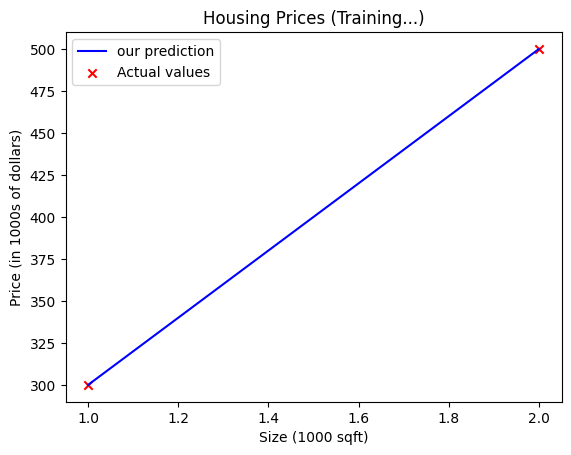

In [84]:
#kind of main function
#intial parameters w and b
w_init=0
b_init=0

#Gradient descent
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# function calling for predicted values
temp_f_wb= calculate_model_output(w_final , b_final , x_train)
#calling calculate_cost function

print(f"Cost function : J{w_final.item() , b_final.item()} = {calculate_cost(x_train , y_train , temp_f_wb)}") #calling cost function


#plot the model prediction
plt.plot(x_train , temp_f_wb , c='b' , label="our prediction")
#plot the data point
plt.scatter(x_train , y_train , marker='x' , c='r' , label="Actual values")
plt.title("Housing Prices (Training...)")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

Enter the size of the house in SQFeet (e.g. 1.200) : 8.34
The price of house for the input size is: $1768 thousand dollars


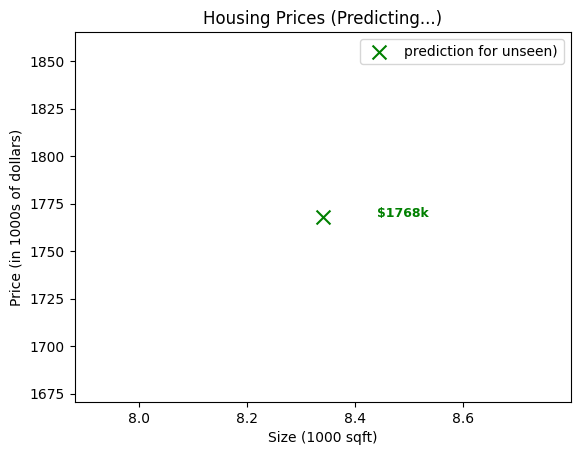

In [75]:
#Model successfully Trained, now lets take a new input X and check that it can predict the price of new input or not
sizeofhouse = float(input("Enter the size of the house in SQFeet (e.g. 1.200) : "))
price = w_final * sizeofhouse + b_final
print(f"The price of house for the input size is: ${price:.0f} thousand dollars")
#plotting the predicted price of unseen size
plt.scatter(sizeofhouse, price , marker='x' , s=100 , c='g' , label="prediction for unseen)")

plt.text(sizeofhouse+0.1, price, f"${price:.0f}k", color='green', fontsize=9, weight='bold') #to show the predicted price in the graph

plt.title("Housing Prices (Predicting...)")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()